# Empirical Discrete Distributions

The empirical distribution describes a sample of observations of a given variable, in this case, a discrete variable. Its value at a given point is equal to the proportion of observations from the sample that are less than or equal to that point.

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set_style("whitegrid")

Calculating the Empirical Distribution Function of an arbitrary Discrete Distribution:

In [2]:
from scipy.stats import rv_discrete

## Working with an unfair die

In [3]:
dk = np.arange(1,7)
dk

array([1, 2, 3, 4, 5, 6])

The probability of '5' is 1/2. The other values have the same probability.

In [4]:
pk = (1/10, 1/10, 1/10, 1/10, 1/2, 1/10)
pk

(0.1, 0.1, 0.1, 0.1, 0.5, 0.1)

Verifying that the sum of probabilities is one.

In [5]:
print(np.array(pk).sum())

1.0


In [6]:
unfair_die = rv_discrete(values=(dk,pk))

Let's plot it.

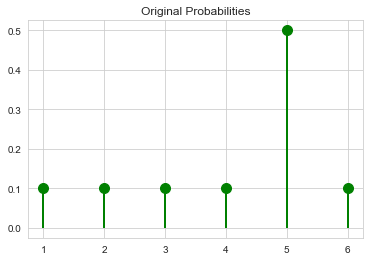

In [7]:
plt.plot(dk, unfair_die.pmf(dk),'go', ms=10)
plt.vlines(dk, 0, unfair_die.pmf(dk), colors='g', lw=2)
plt.title('Original Probabilities');

Let's generate 10 values of our unfair die:

In [8]:
gen_10_values = unfair_die.rvs(size=10)
gen_10_values

array([3, 5, 6, 2, 1, 5, 3, 2, 2, 5])

In [9]:
type(gen_10_values)

numpy.ndarray

In [10]:
elem, freq = np.unique(gen_10_values, return_counts=True)
freq = freq/len(gen_10_values)
print(dict(zip(elem, freq)))

{1: 0.1, 2: 0.3, 3: 0.2, 5: 0.3, 6: 0.1}


Let's graph the results.

The green points represent the actual probabilities.

The orange bars represent the probabilities calculated from the generated values.

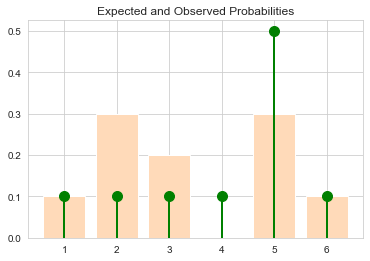

In [11]:
plt.plot(dk, unfair_die.pmf(dk),'go', ms=10)
plt.vlines(dk, 0, unfair_die.pmf(dk), colors='g', lw=2)
plt.bar(elem, freq, color='peachpuff')
plt.title('Expected and Observed Probabilities');

Let's create a function with the previous code:

In [12]:
def generate_unfair_die(n=10):
    gen_values = unfair_die.rvs(size=n)
    elem, freq = np.unique(gen_values, return_counts=True)
    freq = freq/n
    print(dict(zip(elem, freq)))
    plt.plot(dk, unfair_die.pmf(dk),'go', ms=10)
    plt.vlines(dk, 0, unfair_die.pmf(dk), colors='g', lw=2)
    plt.bar(elem, freq, color='peachpuff')
    plt.title('Expected and Observed Probabilities');

{1: 0.3, 3: 0.2, 4: 0.2, 5: 0.3}


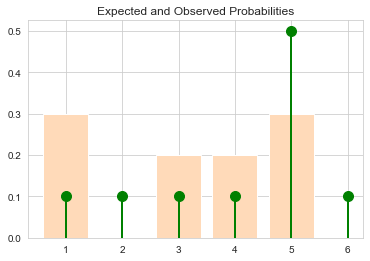

In [13]:
generate_unfair_die(10)

Notice that the previous two results are not the same because we generated different sets of 10 values for each.

Generating 100 values of our unfair die

{1: 0.15, 2: 0.13, 3: 0.08, 4: 0.1, 5: 0.45, 6: 0.09}


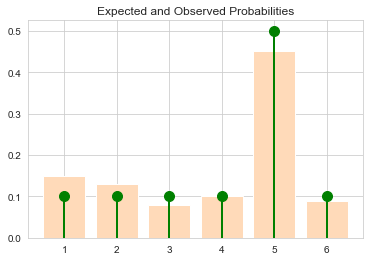

In [14]:
generate_unfair_die(100)

Now the real probabilities (green dots) and the observed ones (orange bars) are much closer.

Generating 1000 values of our unfair die

{1: 0.095, 2: 0.103, 3: 0.092, 4: 0.108, 5: 0.509, 6: 0.093}


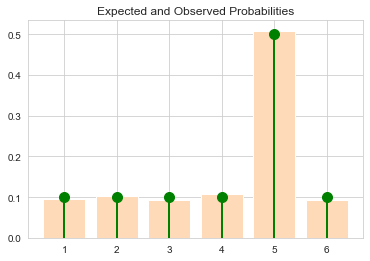

In [15]:
generate_unfair_die(1000)

Again the real probabilities (green dots) and the observed ones (orange bars) are much closer.

Generating 10000 values of our unfair die

{1: 0.0977, 2: 0.1013, 3: 0.1041, 4: 0.0967, 5: 0.4993, 6: 0.1009}


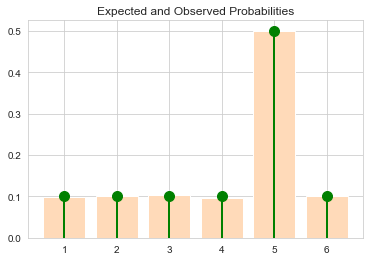

In [16]:
generate_unfair_die(10000)

And so on.

The more random numbers of our unfair die we generate, the more close the real and observed probabilities will be. 

## Using a sequence of random values

Let's create a discrete pdf using a sequence of random values.

Generating uniform values from 1 to 6

In [17]:
seq1 = np.random.randint(1, 7, size=500)
elem1, freq1 = np.unique(seq1, return_counts=True)
freq1 = freq1/len(seq1)
print(dict(zip(elem1, freq1)))

{1: 0.166, 2: 0.17, 3: 0.164, 4: 0.18, 5: 0.134, 6: 0.186}


Generating Poisson values

In [18]:
from scipy.stats import poisson

In [19]:
seq2 = poisson.rvs(mu=1, size=500)
elem2, freq2 = np.unique(seq2, return_counts=True)
freq2 = freq2/len(seq2)
print(dict(zip(elem2, freq2)))

{0: 0.392, 1: 0.346, 2: 0.172, 3: 0.072, 4: 0.012, 5: 0.006}


Combining the two sequences

In [20]:
original_values = np.concatenate([seq1, seq2])

In [21]:
xk, fk = np.unique(original_values, return_counts=True)
fk = fk/len(original_values)
print(dict(zip(xk, fk)))

{0: 0.196, 1: 0.256, 2: 0.171, 3: 0.118, 4: 0.096, 5: 0.07, 6: 0.093}


Creating a discrete distribution function

In [22]:
discrete_f = rv_discrete(values=(xk, fk))

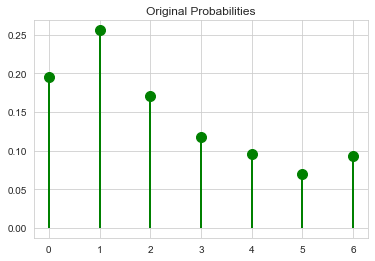

In [23]:
plt.plot(xk, discrete_f.pmf(xk),'go', ms=10)
plt.vlines(xk, 0, discrete_f.pmf(xk), colors='g', lw=2)
plt.title('Original Probabilities');

Generating 10 new values of our new distribution

In [24]:
new_10_values = discrete_f.rvs(size=10)
new_10_values

array([2, 0, 6, 0, 6, 2, 0, 6, 1, 0])

Creating a function:

In [25]:
def generate_discrete_dist(n=10):
    gen_values = discrete_f.rvs(size=n)
    elem, freq = np.unique(gen_values, return_counts=True)
    freq = freq/n
    print(dict(zip(elem, freq)))
    plt.plot(xk, discrete_f.pmf(xk),'go', ms=10)
    plt.vlines(xk, 0, discrete_f.pmf(xk), colors='g', lw=2)
    plt.bar(elem, freq, color='lightgray')
    plt.title('Expected and Observed Probabilities');

{1: 0.1, 2: 0.3, 3: 0.3, 4: 0.1, 6: 0.2}


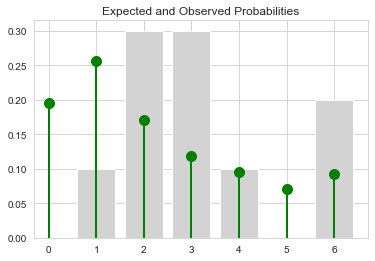

In [26]:
generate_discrete_dist(10)

10 values are not enought. The expected (green dots) and observed (grey bars) probabilities are far away each others.

Generating 100 values

{0: 0.12, 1: 0.28, 2: 0.2, 3: 0.11, 4: 0.13, 5: 0.06, 6: 0.1}


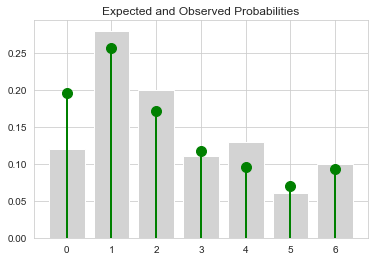

In [27]:
generate_discrete_dist(100)

The results are better, but we can improve them.

Generating 1000 values

{0: 0.197, 1: 0.243, 2: 0.18, 3: 0.124, 4: 0.109, 5: 0.056, 6: 0.091}


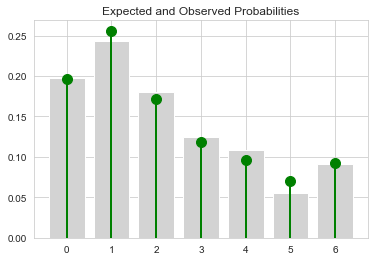

In [28]:
generate_discrete_dist(1000)

Generating 10000 values

{0: 0.197, 1: 0.2607, 2: 0.17, 3: 0.1127, 4: 0.0956, 5: 0.0673, 6: 0.0967}


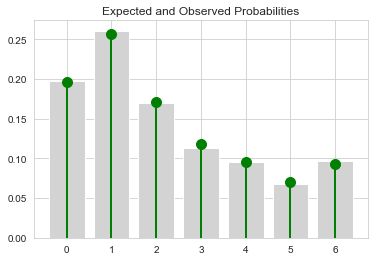

In [29]:
generate_discrete_dist(10000)

Now, the results are much better. The observed and expected probabilities are close enough.

{0: 0.19652, 1: 0.257, 2: 0.17072, 3: 0.11747, 4: 0.09666, 5: 0.06951, 6: 0.09212}


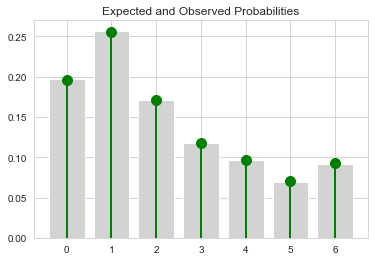

In [30]:
generate_discrete_dist(100000)

The more you increase the generated data, the better results you get.